<a href="https://colab.research.google.com/github/sg-56/ML-Zoomcamp-Homeworks/blob/main/ML_Zoomcamp_HW_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



In [33]:
df = pd.read_csv("bank-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
len(df.columns)

17

In [35]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Most Frequent Value for Column Education

In [36]:
df['education'].mode()

,education
0,secondary


In [37]:
df['education'].value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


## Correlation

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [40]:
corr = df[numeric_cols].corr()


<Axes: >

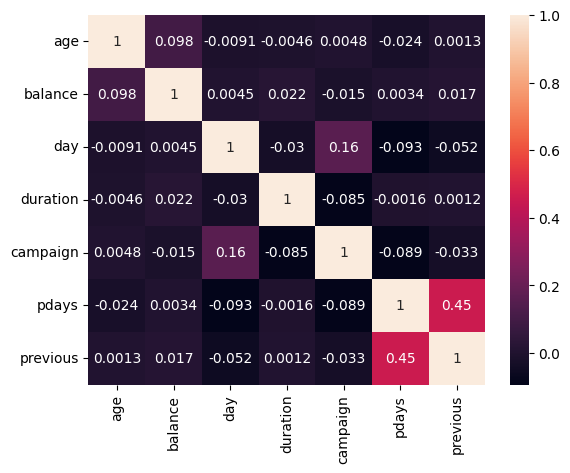

In [41]:
sns.heatmap(corr,annot=True)

In [42]:
corr['age'].sort_values()

,age
pdays,-0.023758
day,-0.009120
duration,-0.004648
previous,0.001288
campaign,0.004760
balance,0.097783
age,1.000000


In [43]:
corr['day'].sort_values()

,day
pdays,-0.093044
previous,-0.051710
duration,-0.030206
age,-0.009120
balance,0.004503
campaign,0.162490
day,1.000000


In [44]:
corr['pdays'].sort_values()

,pdays
day,-0.093044
campaign,-0.088628
age,-0.023758
duration,-0.001565
balance,0.003435
previous,0.454820
pdays,1.000000


# Encoding y variable

In [45]:
df['y'].replace({
    'yes':1,
    'no':0
},inplace=True)

<ipython-input-45-5cbd28256b00>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['y'].replace({
<ipython-input-45-5cbd28256b00>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'].replace({


In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [47]:
X = df.drop(columns=['y'])
y = df['y']

In [48]:
X.shape,y.shape

((45211, 16), (45211,))

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(36168, 16) (9043, 16) (36168,) (9043,)
(27126, 16) (9042, 16) (27126,) (9042,)


In [50]:
print(f"Shape of train Set : X {X_train.shape}\t Y : {y_train.shape}")
print(f"Shape of test Set : X {X_test.shape}\t Y : {y_test.shape}")
print(f"Shape of Val Set : X {X_val.shape}\t Y : {y_val.shape}")

Shape of train Set : X (27126, 16)	 Y : (27126,)
Shape of test Set : X (9043, 16)	 Y : (9043,)
Shape of Val Set : X (9042, 16)	 Y : (9042,)


In [51]:
from sklearn.feature_extraction import DictVectorizer

In [52]:
train_dict = X_train.to_dict(orient='records')
train_dict[0]

{'age': 32,
 'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'default': 'no',
 'balance': 1100,
 'housing': 'yes',
 'loan': 'yes',
 'contact': 'cellular',
 'day': 11,
 'month': 'aug',
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [53]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [54]:
X_train_tr = dv.transform(train_dict)

In [55]:
X_train_tr.shape

(27126, 51)

In [56]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'default=no',
       'default=yes', 'duration', 'education=primary',
       'education=secondary', 'education=tertiary', 'education=unknown',
       'housing=no', 'housing=yes', 'job=admin.', 'job=blue-collar',
       'job=entrepreneur', 'job=housemaid', 'job=management',
       'job=retired', 'job=self-employed', 'job=services', 'job=student',
       'job=technician', 'job=unemployed', 'job=unknown', 'loan=no',
       'loan=yes', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

# Calculating Mutual Scores

In [57]:
from sklearn.metrics import mutual_info_score
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols
for col in cat_cols:
    print(f"{col}\t\t{round(mutual_info_score(X_train[col],y_train),2)}")

job		0.01
marital		0.0
education		0.0
default		0.0
housing		0.01
loan		0.0
contact		0.01
month		0.03
poutcome		0.03


# Training Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_tr, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [59]:
val_dict = X_val.to_dict(orient='records')
X_val_tr = dv.transform(val_dict)


In [60]:
model.predict_proba(X_val_tr)

array([[0.98706854, 0.01293146],
       [0.98992067, 0.01007933],
       [0.85128474, 0.14871526],
       ...,
       [0.93774397, 0.06225603],
       [0.99015315, 0.00984685],
       [0.69092252, 0.30907748]])

In [61]:
preds = model.predict(X_val_tr)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,preds)

0.9002433090024331

In [63]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [64]:
def Evaluate(features,X_train,y_train,X_val,y_val):
    train = X_train[features].copy()
    val = X_val[features].copy()
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    train_dict = train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train_tr = dv.transform(train.to_dict(orient='records'))
    X_val_tr = dv.transform(val.to_dict(orient='records'))
    model.fit(X_train_tr,y_train)
    preds = model.predict(X_val_tr)
    score = accuracy_score(y_val,preds)
    print(score)
    return score


In [65]:
columns = X_train.columns
Evaluate(columns[0:2],X_train,y_train,X_val,y_val)

0.8816633488166334


0.8816633488166334

In [66]:
columns.drop('job')

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [67]:
results = {
    'Col_removed':[],
    'Accuracy':[]
}

for col in columns:
    cols = columns
    cols = cols.drop(col)
    score = Evaluate(cols,X_train,y_train,X_val,y_val)
    results['Col_removed'].append(col)
    results['Accuracy'].append(score)

0.900575094005751
0.9002433090024331
0.9007962840079629
0.900353904003539
0.9002433090024331
0.8998009289980093
0.8994691439946915
0.9000221190002212
0.9006856890068569
0.9007962840079629
0.8998009289980093
0.8898473788984738
0.9000221190002212
0.9001327140013271
0.9001327140013271
0.8943817739438178


In [68]:
results = pd.DataFrame(results)
results['Diff'] = results['Accuracy'] - 0.9002433090024331

In [69]:
results.set_index('Col_removed').sort_values(by='Diff').T[['age','balance','marital','previous']]

Col_removed,age,balance,marital,previous
Accuracy,0.900575,0.899801,0.900796,0.900133
Diff,0.000332,-0.000442,0.000553,-0.000111


In [70]:
scores = {
    'C':[],
    'Accuracy':[]
}
def EvaluateRegularisation(X_train_tr,y_train,X_val_tr,y_val,C):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_tr,y_train)
    preds = model.predict(X_val_tr)
    score = accuracy_score(y_val,preds)
    print(f"C value : {C} \t Accuracy : {score}")
    return score

C = [0.01, 0.1, 1, 10, 100]

for c in C:
    score = EvaluateRegularisation(X_train_tr,y_train,X_val_tr,y_val,c)
    scores['C'].append(c)
    scores['Accuracy'].append(score)

results = pd.DataFrame(scores).sort_values(by='Accuracy',ascending=False)
results

C value : 0.01 	 Accuracy : 0.898363193983632
C value : 0.1 	 Accuracy : 0.900464499004645
C value : 1 	 Accuracy : 0.9002433090024331
C value : 10 	 Accuracy : 0.8999115239991152
C value : 100 	 Accuracy : 0.9002433090024331


,C,Accuracy
1,0.10,0.900464
2,1.00,0.900243
4,100.00,0.900243
3,10.00,0.899912
0,0.01,0.898363
